In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dfresid = pd.read_csv('public_data/both_residuals.csv', index_col=0)

In [111]:
print(dfresid.sort_values(by='xgb_residual')[:30][['county_state', 
                    'xgb_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_residual |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas       

| County, State                  |   Prediction Error |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas              |      -1047.72  |
| Petersburg city, Virginia        |      -1008.12  |
| Sevier County, Arkansas          |       -963.681 |
| Tunica County, Mississippi       |       -952.414 |
| San Francisco County, California |       -934.171 |
| Lincoln County, Colorado         |       -930.412 |
| Arlington County, Virginia       |       -898.588 |
| Greene County, North Carolina    |       -867.263 |
| Alexandria city, Virginia        |       -861.727 |
| Scott County, Iowa               |       -856.461 |
| Bailey County, Texas             |       -841.174 |
| New Castle County, Delaware      |       -838.501 |
| Dallam County, Texas             |       -830.803 |
| Johnson County, Nebraska         |       -818.163 |

In [85]:
print(dfresid.sort_values(by='xgb_median_residual')[:30][['county_state', 
                    'xgb_median_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colora

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colorado         |              -484.992 |
| Petersburg city, Virginia        |              -458.695 |
| Sevier County, Arkansas          |              -449.579 |
| Val Verde County, Texas          |              -431.273 |
| Bailey County, Texas             |              -424.419 |
| San Francisco County, California |              -397.324 |
| Johnson County, Nebraska         |              -397.154 |
| Scott County, Iowa               |              -387.884 |
| Woodford County, Kentucky        |              -379.676 |
| Greene County, North Carolina    |              -375.435 |
| Bent County, Colorado            |              -370.356 |
| La Paz County, Arizona           |              -367.265 |
| Calhoun County, Texas            |              -362.073 |
| Midland County, Texas            |              -352.246 |
| Loving County, Texas             |              -350.269 |
| Geary County, Kansas             |              -344.643 |

In [45]:
dff = pd.read_csv('public_data/xg_importances.csv', index_col=0, keep_default_na=False)

In [48]:
features_all_mi = sorted(list(zip(dff.Feature, dff.Importance)), key=lambda x: x[1])

In [166]:
def plot_features(top, mi):
    plt.figure(figsize=(9,20))
    plt.style.use('default')
#     plt.title('{} top {} features from 2018 US Census county estimates with \n\
#     the greatest predictive power for COVID-19 cases per 100,000 people'.format(
#         model_name, top))
             #  fontsize=20)
    x = [str(p[0]) for p in mi][-top:]
    x = [features[k] if k in features else k for k in x]
    y = [p[1] for p in mi][-top:]
    sns.barplot(y[::-1], x[::-1], alpha=0.8)
    plt.grid(0.2)

In [169]:
features = {'Urban_influence_code_2013': 'Urban influence code score',
            'fiftyfive_fiftynine': 'Percent between the ages 55-59',
            'forty_fortyfour': 'Percent between the ages 40-44',
    'Rural_urban_continuum_code_2013': 'Rural Urban continuum code score',
    'RBIRTH2018': 'Rate of birth',
            'NHNAC': 'Percent Not Hispanic, Native Hawaiian or Pacific Islander alone or in combination',

            'HTOM': 'Percent Hispanic, two or more races',
            'NPOPCHG_2018': 'Percent change in population',
            'RNATURALINC2018': 'Rate of natural increase in population',
            'RDOMESTICMIG2018': 'Net domestic migration rate',
            'sixty_sixtyfour': 'Percent between the ages 60-64',
            'sixtyfive_sixtynine': 'Percent between the ages 65-69',
            'seventyfive_seventynine': 'Percent between the ages 75-79',
            'TOM': 'Percent two or more races',
            'RNETMIG2018': 'Net migration rate',
            'HAAC': 'Percent Hispanic, Asian alone or in combination',
            'NHTOM': 'Percent Not Hispanic, two or more races',
            'HWA': 'Percent Hispanic, White alone',
            'HAA': 'Percent Hispanic, Asian alone',
            'twenty_twentyfour': 'Percent between the ages 20-24',
            'IA': 'Percent American Indian or Alaska Native alone',
            'fifteen_nineteen': 'Percent between the ages 15-19',
            'twentyfive_twentynine': 'Percent between the ages 25-29',
            'NHAAC': 'Percent Not Hispanic, Asian alone or in combination',
            '55': 'East South Central Division of States',
            
    '51': 'New England Division of States', 
 'HBAC':'Percent Hispanic, Black, or African American alone or in combination',
 'NAC': 'Percent Native Hawaiian or Pacific Islander alone or in combination', 
 'thirty_thirtyfour':'Percent between the ages 30-34',
 'AA':'Percent Asian alone',
 'AAC': 'Percent Asian alone or in combination',
 '53': 'West North Central Division of States',
 '54': 'South Atlantic Division of States',
 'NHAA': 'Percent Not hispanic, Asian alone',
 'NHNA': 'Percent Not hispanic, Native Hawaiian or Pacific Islander alone',
 'HBA': 'Percent Hispanic, Black, or African American alone population',
 'BA': ' Percent Black or African American alone',
 'GQESTIMATES2018': 'Percent living in grouping quarters',
 'IAC': 'Percent american indian and Alaska Native alone or in combination',
 'NHBA': 'Percent Not Hispanic, Black or African American alone',
 'NHWAC': 'Not Hispanic, White alone or in combination',
 'TOT_POP': 'Total Population',
 'zero_four': 'Percent between the ages 0-4', 'DENSITY': 'Population density', 
 'HNA': 'Percent Hispanic, Native Hawaiian or Pacific Islander',
'Civilian_labor_force_2018': 'Percent of population in the labor force',
'WAC': 'Percent White alone or in combination',
'fifty_fiftyfour':'Percent between the ages 50-54',
'NHIAC': 'Percent Not Hispanic, American Indian and Alaska Native alone or in combination',
'BAC': 'Percent Black alone or in combination',
'TOT_FEMALE': 'Percent female',
'Median_Household_Income_2018': 'Median household income',
'H': 'Percent Hispanic',
'NH': 'Percent Not Hispanic',
'RINTERNATIONALMIG2018': 'Rate of international migration',
'RDEATH2018': 'Rate of death', 'HIA': 'Percent Hispanic, American Indian and Alaska Native alone',
'NA': 'Percent Native Hawaiian or Pacific Islander alone',
'NHWA': 'Percent Not Hispanic White alone',
'med_age': 'Median Age',
'seventy_seventyfour': 'Percent between the ages 70-74',
'thirtyfive_thirtynine': 'Percent between the ages 35-39',
'LAND_AREA': 'Land area'}

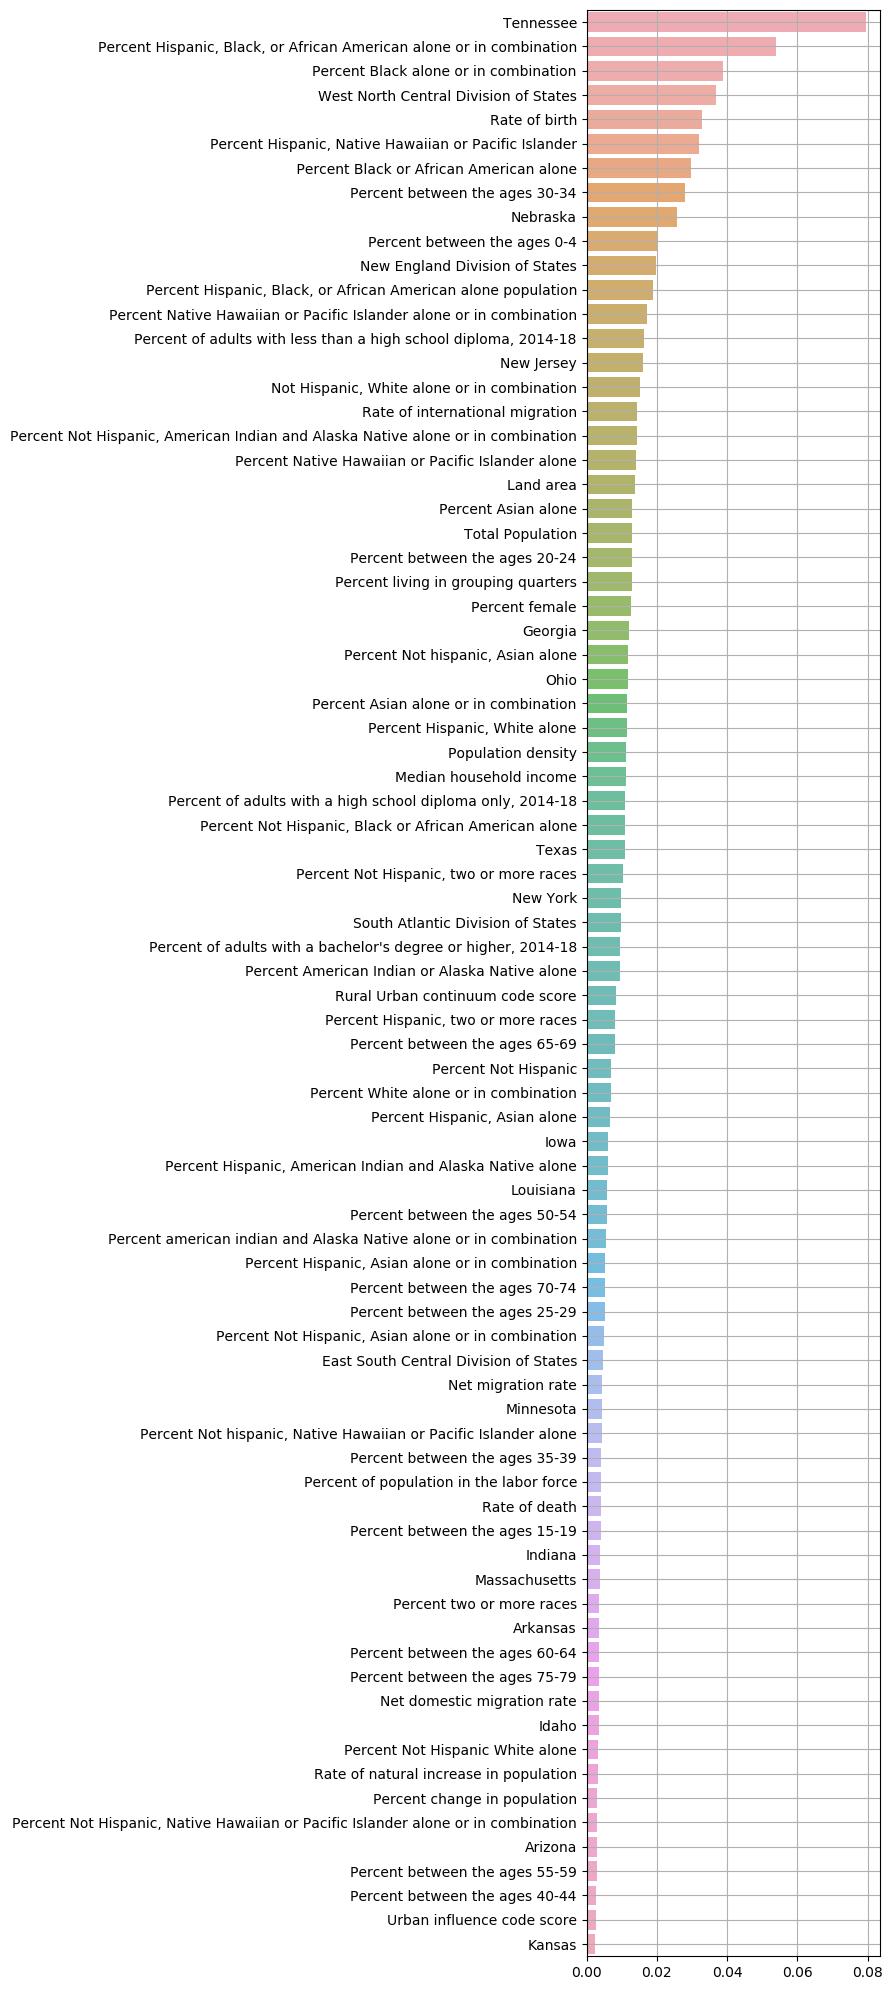

In [170]:
plot_features(80, features_all_mi)
plt.tight_layout()
plt.savefig('plots/xg_features.png', dpi=300)

In [97]:
df = pd.read_csv('../files/modeling_data/census_data_age_gend.csv')

In [98]:
df.columns

Index(['FIPS', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'TOT_POP', 'TOT_MALE',
       'WA', 'BA', 'IA',
       ...
       'Metro_2013',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults completing some college or associate's degree, 2014-18',
       'Percent of adults with a bachelor's degree or higher, 2014-18',
       'LAND_AREA', 'DENSITY', 'med_age', 'per_dem', 'per_gop'],
      dtype='object', length=104)

In [107]:
df.sort_values(by='TOT_POP_eightyfive_older', ascending=False)[['STNAME', 
            'CTYNAME', 'TOT_POP_eightyfive_older', 'TOT_MALE_twenty_twentyfour']][:40]

,STNAME,CTYNAME,TOT_POP_eightyfive_older,TOT_MALE_twenty_twentyfour
1805,New Mexico,Harding County,0.083969,0.400000
2014,North Dakota,McIntosh County,0.075435,0.507937
1698,Nebraska,Hooker County,0.074780,0.391304
906,Kansas,Decatur County,0.066527,0.508475
2030,North Dakota,Sheridan County,0.065975,0.580000
2389,South Dakota,Hand County,0.060392,0.524691
898,Kansas,Cheyenne County,0.060150,0.589552
1719,Nebraska,Pawnee County,0.060030,0.530435
1349,Minnesota,Lac qui Parle County,0.058576,0.481013
2404,South Dakota,McPherson County,0.058164,0.568421


In [112]:
dfresid

,fips,xgb_residual,county_state,xgb_median_residual
0,1001,-9.839111,"Autauga County, Alabama",47.493509
1,1003,3.932831,"Baldwin County, Alabama",13.711398
2,1005,-190.207640,"Barbour County, Alabama",17.145837
3,1007,-135.137900,"Bibb County, Alabama",-2.467827
4,1009,-109.677826,"Blount County, Alabama",-62.462993
...,...,...,...,...
3135,56037,-195.980290,"Sweetwater County, Wyoming",-125.932028
3136,56039,-24.728820,"Teton County, Wyoming",90.603163
3137,56041,-71.138490,"Uinta County, Wyoming",-62.388335
3138,56043,-37.771027,"Washakie County, Wyoming",-27.363083


In [150]:
dfcv = pd.read_csv('../files/covid_confirmed_usafacts.csv')

dates = dfcv.columns[4:]

changed_dates = {date: date.replace('/', '_') for date in dates}

dfcv = dfcv.rename(columns=changed_dates)

dfcv.countyFIPS = dfcv.countyFIPS.map(lambda x: '{:05d}'.format(x))

dfcv = dfcv.set_index('countyFIPS')

In [151]:
cases_date = '5_16_20'

In [152]:
df = pd.read_csv('../files/modeling_data/census_data.csv', index_col=0)

dft = pd.DataFrame(dfcv[cases_date])

df.index = df.index.map(lambda x: '{:05d}'.format(x))

df = df.join(dft)

df[cases_date] = 100_000 * df[cases_date] / df.TOT_POP

df.rename(columns={cases_date:'CPC'}, inplace = True)

df = df.reset_index()

df = df.rename(columns={'index':'FIPS'})

In [153]:
# Drop the District of Columbia
df = df.loc[df.STNAME != 'District of Columbia']

len(df.STNAME.unique())

50

In [163]:
df

,CPC,xgb_residual,county_state,xgb_median_residual,abs_xgb_residual
FIPS,,,,,
01001,197.838168,-9.839111,"Autauga County, Alabama",47.493509,9.839111
01003,116.502004,3.932831,"Baldwin County, Alabama",13.711398,3.932831
01005,317.511354,-190.207640,"Barbour County, Alabama",17.145837,190.207640
01007,223.214286,-135.137900,"Bibb County, Alabama",-2.467827,135.137900
01009,77.800830,-109.677826,"Blount County, Alabama",-62.462993,109.677826
...,...,...,...,...,...
56037,37.165223,-195.980290,"Sweetwater County, Wyoming",-125.932028,195.980290
56039,298.947186,-24.728820,"Teton County, Wyoming",90.603163,24.728820
56041,39.410808,-71.138490,"Uinta County, Wyoming",-62.388335,71.138490


In [164]:
df.to_csv('public_data/modeling_data.csv')

In [157]:
# dfresid.fips = dfresid.fips.map(lambda x: '{:05d}'.format(x))

In [158]:
df.set_index('FIPS')[['CPC']].join(dfresid.set_index('fips'
                                )).to_csv('public_data/both_residuals.csv')

In [159]:
df = df.set_index('FIPS')[['CPC']].join(dfresid.set_index('fips'))

In [160]:
df['abs_xgb_residual'] = abs(df.xgb_residual)

In [162]:
df.sort_values(by='abs_xgb_residual')[-30:]

,CPC,xgb_residual,county_state,xgb_median_residual,abs_xgb_residual
FIPS,,,,,
13243,2473.291380,1726.6566,"Randolph County, Georgia",2053.467970,1726.6566
51001,2060.965075,1740.8596,"Accomack County, Virginia",1854.406317,1740.8596
20057,3833.215297,1762.0603,"Ford County, Kansas",2751.131779,1762.0603
13273,2310.997561,1787.2059,"Terrell County, Georgia",2002.595711,1787.2059
36087,3895.669261,1796.1003,"Rockland County, New York",2799.378761,1796.1003
19115,2739.726027,1821.1428,"Louisa County, Iowa",2233.928394,1821.1428
13259,596.870463,-1838.7804,"Stewart County, Georgia",-667.460988,1838.7804
30077,0.000000,-1850.9277,"Powell County, Montana",-971.988345,1850.9277
13099,2273.836245,1863.8792,"Early County, Georgia",2022.351702,1863.8792


In [115]:
df

,FIPS,STATE,COUNTY,STNAME,CTYNAME,TOT_POP,TOT_MALE,WA,BA,IA,...,Metro_2013,"Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18",LAND_AREA,DENSITY,med_age,per_dem,per_gop
0,1001,1,1,Alabama,Autauga County,55601,0.485513,0.767252,0.196309,0.004802,...,1.0,11.3,32.6,28.4,27.7,594.44,93.535092,37.8,0.239569,0.734358
1,1003,1,3,Alabama,Baldwin County,218022,0.484616,0.872852,0.089404,0.007724,...,1.0,9.7,27.6,31.3,31.3,1589.78,137.139730,42.6,0.195653,0.773515
2,1005,1,5,Alabama,Barbour County,24881,0.527832,0.490696,0.483984,0.006591,...,0.0,27.0,35.7,25.1,12.2,884.88,28.117937,39.7,0.466603,0.522714
3,1007,1,7,Alabama,Bibb County,22400,0.532188,0.768348,0.212946,0.004375,...,1.0,16.8,47.3,24.4,11.5,622.58,35.979312,39.8,0.214220,0.769662
4,1009,1,9,Alabama,Blount County,57840,0.492739,0.958783,0.016425,0.006535,...,1.0,19.8,34.0,33.5,12.6,644.78,89.705016,40.9,0.084699,0.898519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,56037,56,37,Wyoming,Sweetwater County,43051,0.514553,0.938352,0.013751,0.015447,...,0.0,9.0,33.3,35.7,22.0,10426.65,4.128939,34.0,0.194046,0.729428
3137,56039,56,39,Wyoming,Teton County,23081,0.515966,0.951908,0.007582,0.009142,...,0.0,5.6,13.2,23.8,57.4,3995.38,5.776922,39.0,0.600608,0.321945
3138,56041,56,41,Wyoming,Uinta County,20299,0.506675,0.953545,0.008276,0.014188,...,0.0,7.2,40.1,37.2,15.4,2081.26,9.753226,35.1,0.149261,0.764187
3139,56043,56,43,Wyoming,Washakie County,7885,0.505770,0.944832,0.005073,0.018136,...,0.0,10.4,30.3,37.7,21.5,2238.55,3.522369,43.4,0.143203,0.783580
